In [1]:
from IPython.display import Image

# 1 사전 학습된 모델은 어떻게 사용하는가

## 1.1 VGG - 그냥 일자로~ 깊은 아이

## 1.2 저 복잡한 아이를 직접 훈련시켜야 하나?

## 1.3 그런데 이미 학습된 모델을 단지 그냥 사용해 볼 수 있다

In [2]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

## 1.4 모델이 학습을 하려면 데이터가 있어야한다. 우리는 imagenet으로 학습된 vgg16을

In [3]:
model = VGG16(weights='imagenet')

2022-11-28 15:57:46.573837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:57:46.580885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:57:46.581266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:57:46.581898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

553467096/553467096 [==============================] - 6s 0us/step


## 1.5 이미지넷 데이터는 여기서 구경가능

## 1.6 이미지넷의 라벨이 궁금하다면

## 1.7 200만개의 사진으로 동물들 이름을 학습한 모델을 가지고 왔다

## 1.8 마스크 쓴 강아지~ 뭘까?

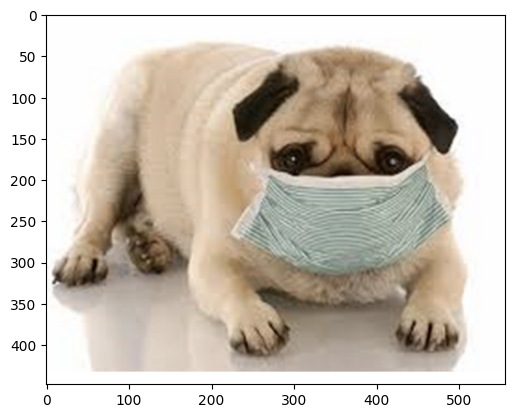

In [25]:
import matplotlib.pyplot as plt

image = cv2.imread("dog.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

## 1.9 텐서플로우가 제공하는 전처리 함수 적용

In [26]:
image = cv2.resize(image,dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)

## 1.10 바로 예측~ pug래.. 응 pug?

In [27]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 [==============================] - 0s 20ms/step
pug (82.07%)


## 1.11 pug의 중요 특성이 마스크로 가려젔는데 맞춘다

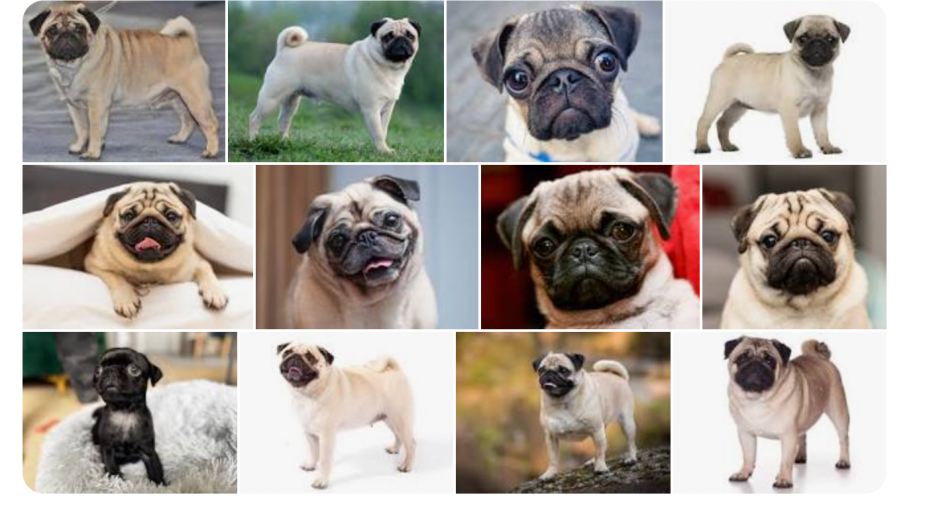

In [34]:
Image('./vgg1.png')

## 1.12 top5 예측 결과

In [28]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.820651),
  ('n03803284', 'muzzle', 0.10110986),
  ('n02099712', 'Labrador_retriever', 0.019216716),
  ('n02104029', 'kuvasz', 0.01688512),
  ('n02112706', 'Brabancon_griffon', 0.00494507)]]

## 1.13 이번에는 예전의 dogs and cats

In [29]:
import os

path = "./dogs-vs-cats/train/"
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

## 1.14 추가 import

In [30]:
import random
import matplotlib.image as mpimg

## 1.15 이미지 읽기

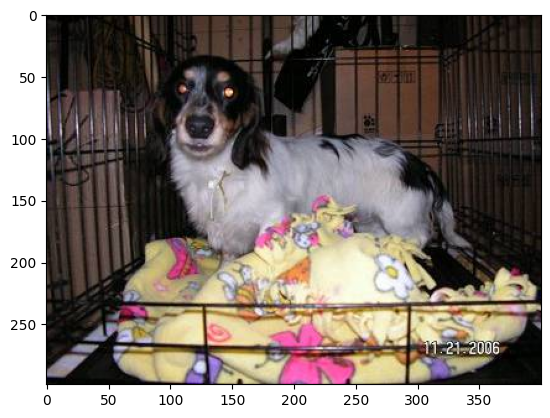

In [37]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

## 1.16 Shetland Sheepdog?

In [38]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 [==============================] - 0s 25ms/step
Shetland_sheepdog (47.29%)


## 1.17 사진의 정확도가 갑자기..

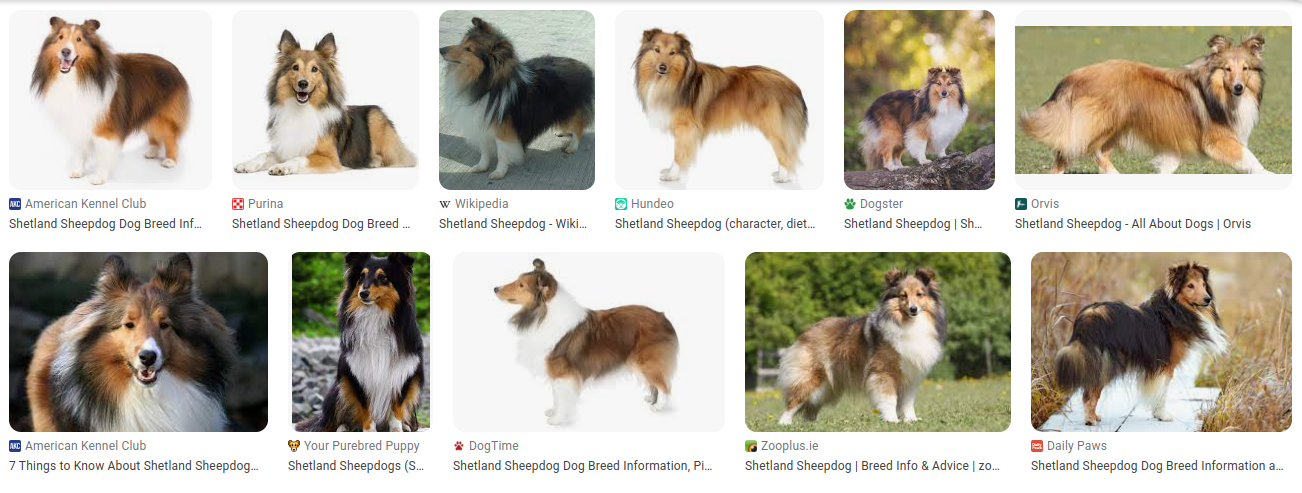

In [39]:
Image('./vgg2.png')

## 1.18 resize 및 preprocessing 함수 하나

In [13]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
    return preprocess_input(image)

## 1.19 예측 결과 뽑는 함수 하나

In [14]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

## 1.20 랜덤하게 6개만 뽑아보자
## 1.21 품종을 맞춘다

1/1 [==============================] - 0s 13ms/step


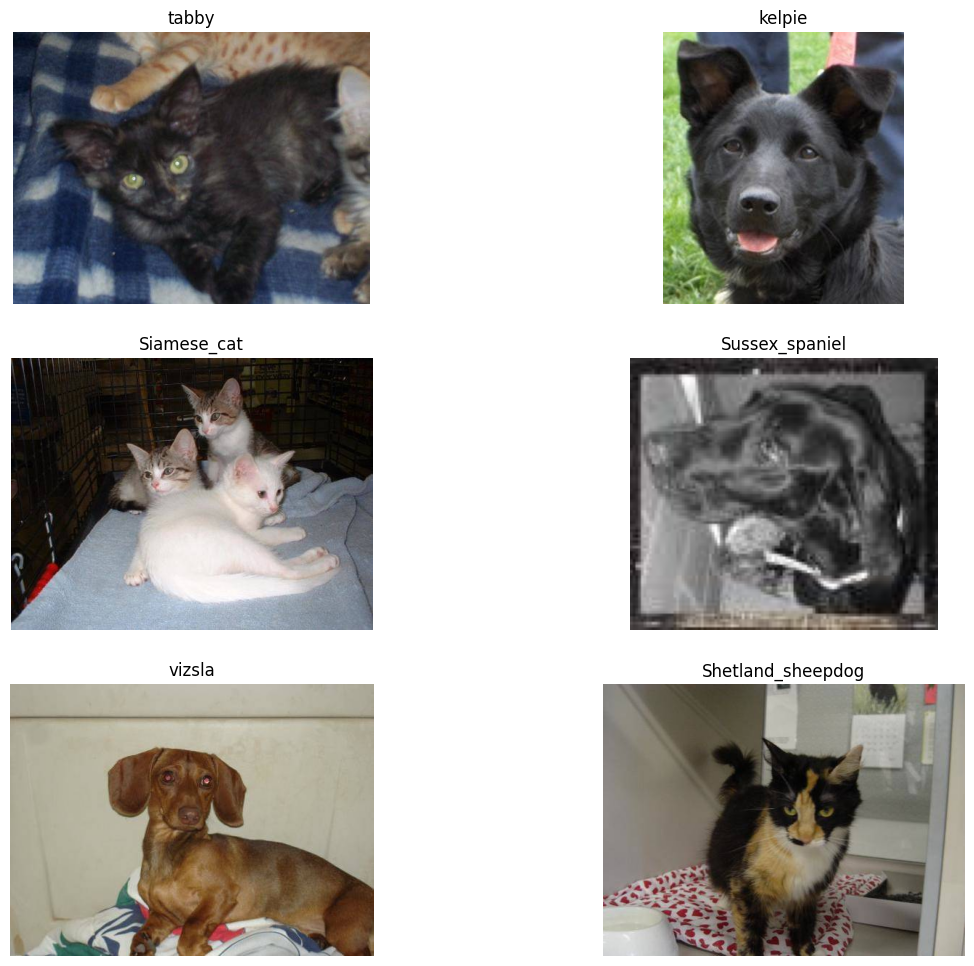

In [16]:
plt.figure(figsize=(14,12))
idx = 1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path + each)
    plt.subplot(3,2,idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')

plt.show()